In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from copy import copy

In [7]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [19]:
region = 'SO'
mortality = 0.16              # [d-1]
runtime = 20                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['fixed','no']

In [20]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [21]:
dslist = [ds_0, ds_1]

In [22]:
mixing_cmap = ['firebrick','seagreen']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue']

In [29]:
number_of_trajectories_to_plot = 200
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 200 of 10000 trajectories
plotting every 50 particles


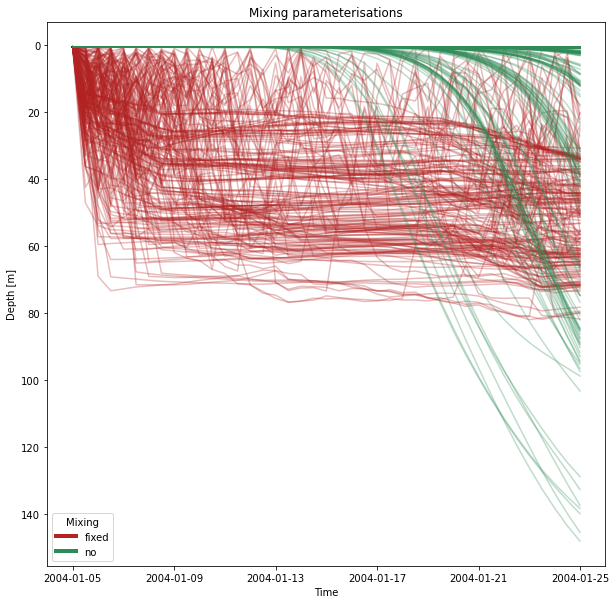

In [30]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].T[:,::f_plt], dslist[i]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

ax.set_title('Mixing parameterisations')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.invert_yaxis()
ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

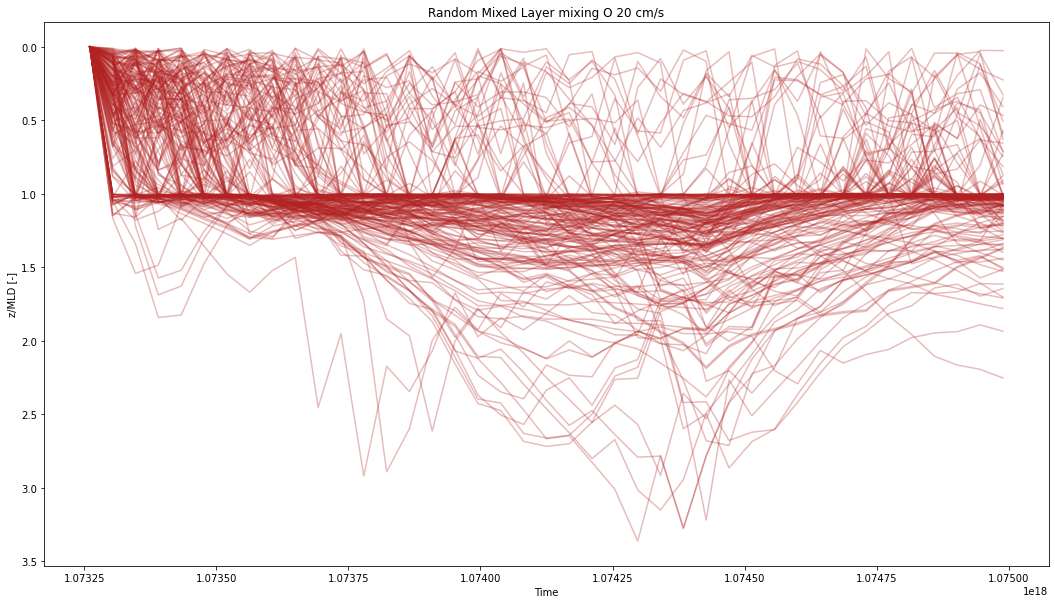

In [31]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

ax.plot(dslist[0]['time'].astype('O').T[:,::f_plt], dslist[0]['mld'].T[:,::f_plt], c=mixing_cmap[0], alpha=0.3, label = mixing[0])
# ax.scatter(dslist[0]['time'].astype('O').T[:,:n_plt], dslist[0]['mld'].T[:,:n_plt], c=dslist[0]['mld'].T[:,:n_plt], cmap = 'Reds', alpha=0.8)
# ax.set_ylim(0,35)
# ax.set_xlim()
ax.set_title('Random Mixed Layer mixing O 20 cm/s')
ax.set_ylabel('z/MLD [-]')
ax.set_xlabel('Time')

ax.invert_yaxis()
plt.show()

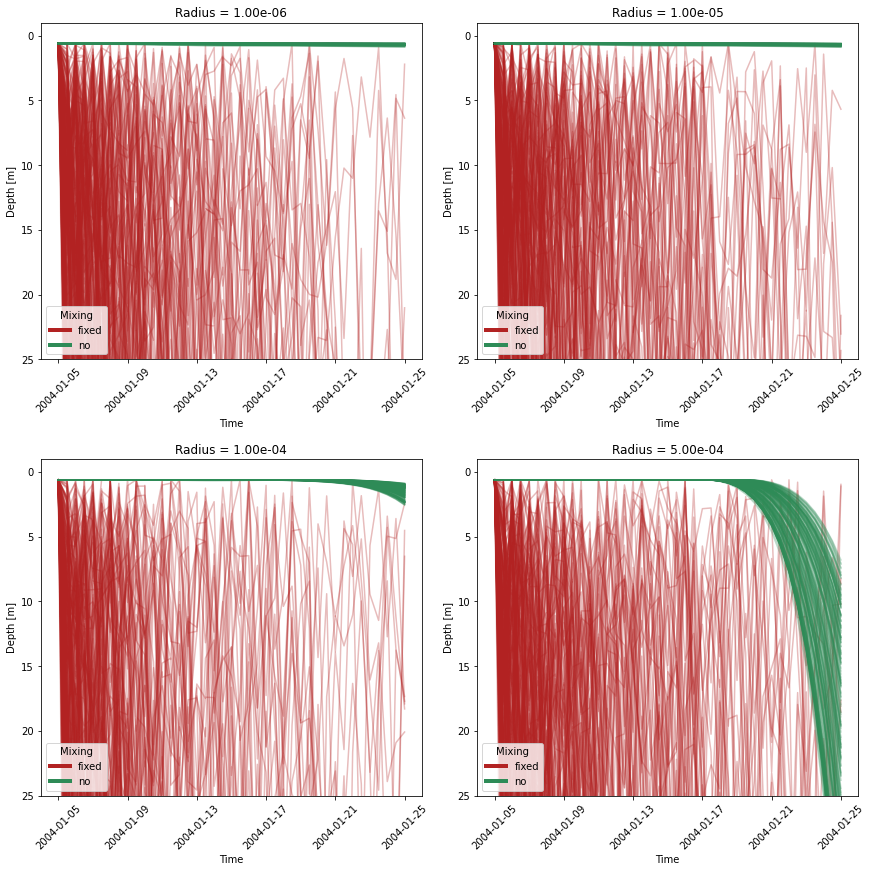

In [26]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby('r_pl'))
        ax.plot(split_ds[r][1]['time'].T[:,:n_plt], split_ds[r][1]['z'].T[:,:n_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{:.2e}".format(split_ds[r][0]))
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(25,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

#     ax.invert_yaxis()
    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

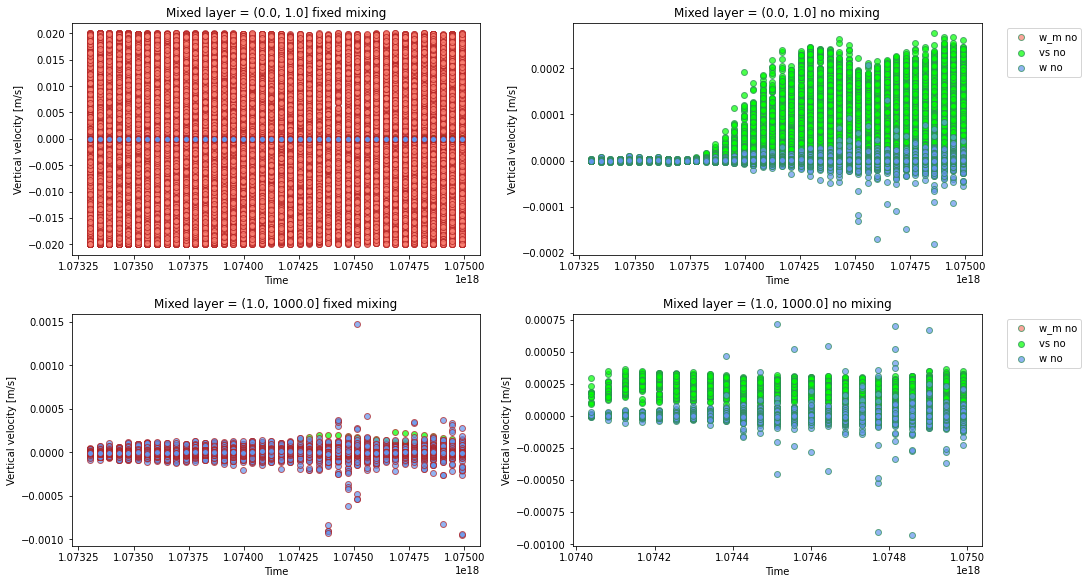

In [27]:
fig = plt.figure(figsize=(15,8), constrained_layout = True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [[ax1, ax2], [ax3, ax4]]

for r, axr in enumerate(axes):
    for i, ax in enumerate(axr):
        split_ds = list(dslist[i].groupby_bins('mld',[0,1,1000]))
        ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['w_m'], c=w_vel_cmap[0], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_m '+mixing[i])
        ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['vs'], c=w_vel_cmap[1], edgecolor=mixing_cmap[i], alpha=0.7, label = 'vs '+mixing[i])
        ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['w'], c=w_vel_cmap[2], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w '+mixing[i])

        ax.set_xlabel('Time')
        ax.set_ylabel('Vertical velocity [m/s]')
        ax.set_title('Mixed layer = '+ str(split_ds[r][0])+' '+mixing[i]+' mixing')
    axr[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')